In [1]:
# !pip install pandas


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint


%matplotlib inline
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

# Data

In [2]:
df = pd.read_pickle('new_df.pkl')
on = pd.read_pickle('new_on.pkl')
off = pd.read_pickle('new_off.pkl')
display(df.head(3), on.head(3), off.head(3))

,영수증번호,채널구분,제휴사,점포코드,구매연도,구매월,구매일,구매요일,상품코드,구매일자,...,구매금액,구매수량,총액,상품명,대분류명,중분류명,점포대분류코드,점포중분류코드,성별,연령대
ID,,,,,,,,,,,,,,,,,,,,,
M430112881,A01000001113,1,A01,A010039,2021,1,1,금요일,PD0290,2021-01-01,...,15000.0,1,15000.0,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50대
M646853852,A01000002265,1,A01,A010025,2021,1,1,금요일,PD1369,2021-01-01,...,79700.0,1,79700.0,기타주방일회용품,주방잡화,주방일회용품,Z13,Z13001,여성,40대
M430112881,A01000003148,1,A01,A010039,2021,1,1,금요일,PD0290,2021-01-01,...,19000.0,1,19000.0,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50대


,ID,영수증번호,제휴사,점포코드,상품코드,구매연도,구매월,구매일,구매요일,구매시간,구매금액,총액,구매수량,상품명,대분류명,중분류명,성별,연령대
0,M533330698,E01000012036,A01,온라인,PD0954,2021,1,1,금요일,1,39000.0,39000.0,1,여성스웨터/풀오버,여성의류,여성의류상의,여성,30대
1,M661395471,E01000013847,A01,온라인,PD1706,2021,1,1,금요일,10,168000.0,168000.0,1,남성백팩,패션잡화,남성가방,남성,40대
2,M594992791,E01000014987,A01,온라인,PD1810,2021,1,1,금요일,11,30000.0,30000.0,1,남성장갑,패션잡화,장갑,여성,40대


,ID,영수증번호,제휴사,점포코드,상품코드,구매연도,구매월,구매일,구매요일,구매시간,구매금액,총액,구매수량,상품명,대분류명,중분류명,점포대분류코드,점포중분류코드,성별,연령대
0,M430112881,A01000001113,A01,A010039,PD0290,2021,1,1,금요일,10,15000.0,15000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50대
1,M646853852,A01000002265,A01,A010025,PD1369,2021,1,1,금요일,10,79700.0,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,Z13,Z13001,여성,40대
2,M430112881,A01000003148,A01,A010039,PD0290,2021,1,1,금요일,10,19000.0,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50대


# <span style= "color:blue"> Analyze </span>
데이터 분석(상관 관계, 추세, 변동 등)

In [3]:
# 연령별 구매수량 비율
compare_col = ['연령대']

print("off", off[compare_col].value_counts(normalize = True).sort_values(ascending = False))
print("")
print("on", on[compare_col].value_counts(normalize = True).sort_values(ascending = False))

off 연령대
40대    0.405200
30대    0.230835
50대    0.213426
60대    0.066853
20대    0.061215
70대    0.022471
dtype: float64

on 연령대
40대    0.540031
30대    0.253353
50대    0.160230
20대    0.025153
60대    0.018503
70대    0.002730
dtype: float64


# <span style= "color:blue"> Visualize </span>
분석 과정 또는 결과 시각화

<AxesSubplot:xlabel='구매월', ylabel='count'>

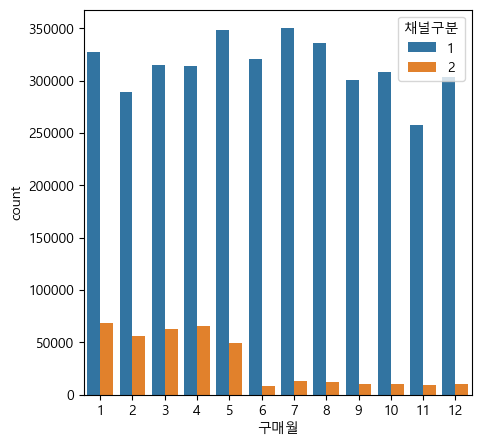

In [4]:
# 월 별 온,오프라인 수
plt.figure(figsize = (5,5))
sns.countplot(x='구매월',hue = '채널구분', data = df)

↳ 오프라인 구매 증감에는 큰 차이가 없으나 <br/>
온라인은 1~5월에 집중되어있고, 하반기부터 확 줄음.  <br/>
<span style = "color:red"> => 이에 의문점 가짐

# <span style = "color:red"> "하반기 온라인 구매량" 급격한 감소

## 온라인 감소량 원인 찾아보기

#### 1. 대분류명

구매량이 하반기에 특히 감소된 대분류명 품목이 있는지 확인

In [5]:
# 온라인 5월, 6월 "대분류명" 별 감소량 정리
b=on.groupby(['구매월','대분류명'])['구매수량'].sum();b
a5=b[5] # 5월 대분류명 별 수
a5.to_frame() 
a6=b[6] # 6월 대분류명 별 수
a6.to_frame()
h = pd.merge(a5, a6, on = '대분류명', how = 'left', suffixes=('5월','6월')) #대분류명을 기준으로 merge

h.head()


,구매수량5월,구매수량6월
대분류명,,
가구,107,4.0
건강식품,447,19.0
건강용품,458,14.0
건해산물,760,131.0
계절가전,51,12.0


In [6]:
# 증감률 계산
h['증감률'] = ((h['구매수량6월'] - h['구매수량5월'])/h['구매수량5월']) *100
k = (h['구매수량5월'] >= 5000) & (h['증감률'] <=-90) 
t = (h['증감률'] <=-90)
h.loc[k | t]

,구매수량5월,구매수량6월,증감률
대분류명,,,
가구,107,4.0,-96.261682
건강식품,447,19.0,-95.749441
건강용품,458,14.0,-96.943231
공구/안전용품,205,7.0,-96.585366
구기/필드스포츠,97,8.0,-91.752577
문구/사무용품,326,8.0,-97.546012
생활/주방가전,129,11.0,-91.472868
속옷/양말/홈웨어,628,32.0,-94.904459
식기/조리기구,286,18.0,-93.706294


Text(221.72222222222223, 0.5, '구매월')

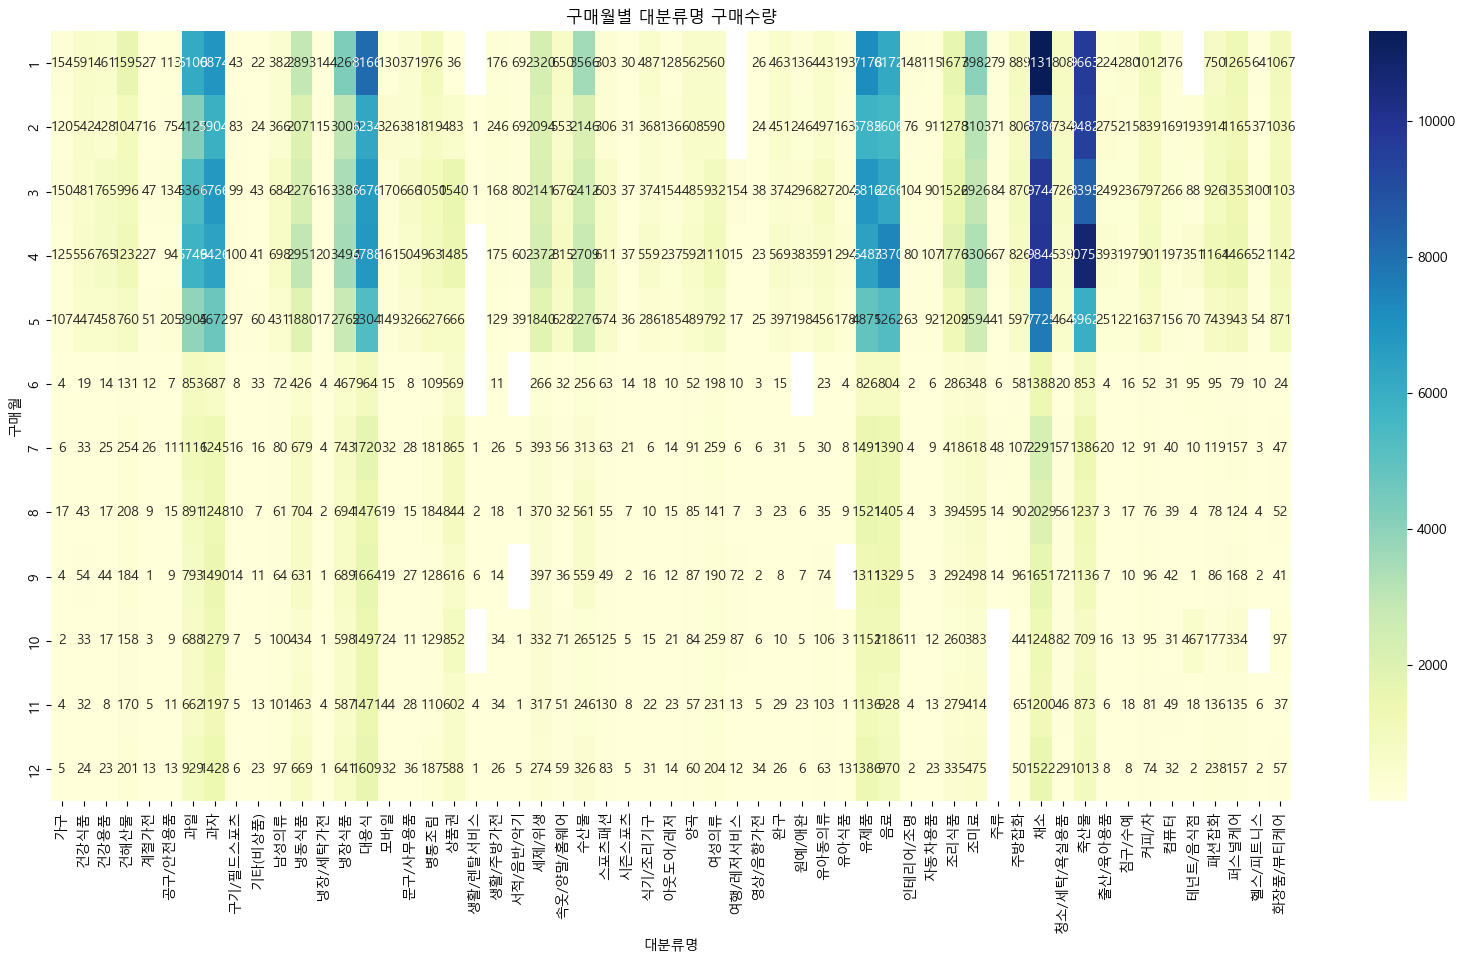

In [7]:
# 구매월별 대분류명 구매수량
on_pivot= on.pivot_table(index='구매월', columns='대분류명', values='구매수량', aggfunc='sum')
plt.figure(figsize=(20,10))
sns.heatmap(on_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('구매월별 대분류명 구매수량')
plt.xlabel('대분류명')
plt.ylabel('구매월')

# 하반기에 전반적으로 다같이 감소
# 그 중 특히 상반기에 구매수가 많았던 [과일, 과자, 대용식, 유제품, 음료, 채소, 축산물] 은 더욱 줄어들었음을 확인 가능

#### 2. 제휴사


1 ) 온라인 5월, 6월 "제휴사별" 감소량 정리

In [8]:
#on.groupby(['구매월', '제휴사'])['구매수량'].sum().to_frame().head(10)
## 위 코드를 더 보기 쉽도록 wide 형태로 변환 - unstack 활용
on_aff = on.groupby(['구매월', '제휴사'])['구매수량'].sum(); on_aff.to_frame().unstack()

구매수량                          
제휴사   A01    A02    A03  A05    A06
구매월                                
1    1048  60368  16658  144  11972
2    1070  49883  11840   89  12362
3    1117  53298  13647  148  15718
4     959  57719  13239  283  18145
5     879  41038  10781  101  11496
6      66   1395   7339  100   1480
7     109   2065  12199  127   2232
8      77   2066  11547   83   1816
9     107   1607  11178   78   1864
10    231   1694   8535   89   3044
11    138   1943   8030  139   2009
12    109   2055   9861  148   1977

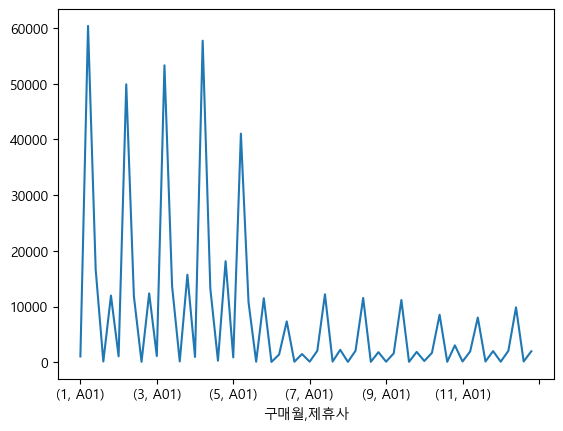

In [9]:
#시각화
on_aff.plot.line() # subplots = False
plt.show()
#  "A02와 A06" 제휴사가 특히 줄어듦을 확인 가능

2 ) "i월/(i+1)월 제휴사" 별 구매수량 증감률 구하기


    < 원리 >

In [10]:
#on_aff = on.groupby(['구매월', '제휴사'])['구매수량'].sum()

In [11]:
# a. "i월/(i+1)월 제휴사" 별 구매수량 비교
dfs = []
h = pd.DataFrame()
change_rate=[]

for i in range(1,12):
    ax=on_aff[i].to_frame()  # i월 제휴사 별 구매수량
    ay=on_aff[i+1].to_frame()  # (i+1)월 제휴사 별 구매수량
    temp_df = pd.merge(ax, ay, on = '제휴사', suffixes=(f'{i}월',f'{i+1}월'), how = 'left')

print(temp_df.head(2)) #11, 12월 제휴사 별 구매수량

     구매수량11월  구매수량12월
제휴사                  
A01      138      109
A02     1943     2055


In [12]:
# b. (11월->12월)증감률 계산 
change_rate = pd.DataFrame()
change_rate['증감률'] = ((temp_df.iloc[:,1]- temp_df.iloc[:,0]) / (temp_df.iloc[:,0])) *100
change_rate


,증감률
제휴사,
A01,-21.014493
A02,5.764282
A03,22.801993
A05,6.474820
A06,-1.592832


In [13]:
#  c. concat - "i월/(i+1)월 제휴사" 별 구매수량 비교
dfs = []
h = pd.DataFrame()

for i in range(1,12):
    ax=on_aff[i].to_frame()  # i월 제휴사 별 수
    ay=on_aff[i+1].to_frame()  # (i+1)월 제휴사 별 수
    dfs = [ax,ay]
    temp_df = pd.merge(ax, ay, on = '제휴사', suffixes=(f'{i}월',f'{i+1}월'), how = 'left')
    h = pd.concat([h, temp_df], axis=1)

print(h)
    

     구매수량1월  구매수량2월  구매수량2월  구매수량3월  구매수량3월  구매수량4월  구매수량4월  구매수량5월  구매수량5월  \
제휴사                                                                           
A01    1048    1070    1070    1117    1117     959     959     879     879   
A02   60368   49883   49883   53298   53298   57719   57719   41038   41038   
A03   16658   11840   11840   13647   13647   13239   13239   10781   10781   
A05     144      89      89     148     148     283     283     101     101   
A06   11972   12362   12362   15718   15718   18145   18145   11496   11496   

     구매수량6월  ...  구매수량7월  구매수량8월  구매수량8월  구매수량9월  구매수량9월  구매수량10월  구매수량10월  \
제휴사          ...                                                             
A01      66  ...     109      77      77     107     107      231      231   
A02    1395  ...    2065    2066    2066    1607    1607     1694     1694   
A03    7339  ...   12199   11547   11547   11178   11178     8535     8535   
A05     100  ...     127      83      83      78      78

##### <span style = "color:red"> < 적용 >

In [14]:
#  "i월/(i+1)월 제휴사" 별 구매수량 비교
# c틀에서 [a생성 후, a에 b적용 시키기]

dfs = []
h = pd.DataFrame()

for i in range(1,12):
    # a. 'i월/(i+1)월 제휴사 별 구매수량 비교' 프레임 만들기
    ax=on_aff[i].to_frame()  # i월 제휴사 별 구매수량
    ay=on_aff[i+1].to_frame()  # (i+1)월 제휴사 별 구매수량
    dfs = [ax,ay]
    temp_df = pd.merge(ax, ay, on = '제휴사', suffixes=(f'{i}월',f'{i+1}월'), how = 'left')

    # b. 증감률 계산
    change_rate = pd.DataFrame()
    change_rate[f'{i}월->{i+1}월 증감률'] = ( (temp_df.iloc[:,1]- temp_df.iloc[:,0])/(temp_df.iloc[:,0])) *100 

    # c. concat
    h = pd.concat([h, change_rate], axis=1)

display(h)

,1월->2월 증감률,2월->3월 증감률,3월->4월 증감률,4월->5월 증감률,5월->6월 증감률,6월->7월 증감률,7월->8월 증감률,8월->9월 증감률,9월->10월 증감률,10월->11월 증감률,11월->12월 증감률
제휴사,,,,,,,,,,,
A01,2.099237,4.392523,-14.145031,-8.342023,-92.491468,65.151515,-29.357798,38.961039,115.887850,-40.259740,-21.014493
A02,-17.368473,6.846020,8.294870,-28.900362,-96.600712,48.028674,0.048426,-22.216844,5.413815,14.698937,5.764282
A03,-28.923040,15.261824,-2.989668,-18.566357,-31.926537,66.221556,-5.344700,-3.195635,-23.644659,-5.916813,22.801993
A05,-38.194444,66.292135,91.216216,-64.310954,-0.990099,27.000000,-34.645669,-6.024096,14.102564,56.179775,6.474820
A06,3.257601,27.147711,15.440896,-36.643703,-87.125957,50.810811,-18.637993,2.643172,63.304721,-34.001314,-1.592832


### 대분류명과 제휴사의 연관성 - 제휴사의 주요 상품

In [15]:
on_A01 = on.query('제휴사 =="A01"').groupby(['대분류명'])['구매수량'].sum().sort_values().to_frame()
on_A02 = on.query('제휴사 =="A02"').groupby(['대분류명'])['구매수량'].sum().sort_values().to_frame()
on_A03 = on.query('제휴사 =="A03"').groupby(['대분류명'])['구매수량'].sum().sort_values().to_frame()
on_A04 = on.query('제휴사 =="A04"').groupby(['대분류명'])['구매수량'].sum().sort_values().to_frame()
on_A05 = on.query('제휴사 =="A05"').groupby(['대분류명'])['구매수량'].sum().sort_values().to_frame()
on_A06 = on.query('제휴사 =="A06"').groupby(['대분류명'])['구매수량'].sum().sort_values().to_frame()

on_제휴사 = pd.concat([on_A01, on_A02, on_A03, on_A04, on_A05, on_A06],
            axis=1,  keys=['A01', 'A02', 'A03', 'A04', 'A05', 'A06']);on_제휴사

on_제휴사.fillna(0, inplace=True)
on_제휴사

,A01,A02,A03,A04,A05,A06
,구매수량,구매수량,구매수량,구매수량,구매수량,구매수량
대분류명,,,,,,
세제/위생,1.0,8189.0,3282.0,0.0,4.0,1640
유아식품,1.0,911.0,4.0,0.0,1.0,153
원예/애완,1.0,486.0,34.0,0.0,11.0,779
서적/음반/악기,1.0,1.0,0.0,0.0,0.0,328
상품권,1.0,11.0,0.0,0.0,0.0,9134
병통조림,1.0,3071.0,1746.0,0.0,0.0,645
냉장식품,2.0,13240.0,6978.0,0.0,0.0,1107
컴퓨터,4.0,2.0,0.0,0.0,297.0,925


In [16]:
on_제휴사.median()

A01  구매수량     11.0
A02  구매수량    486.0
A03  구매수량     24.0
A04  구매수량      0.0
A05  구매수량      1.0
A06  구매수량    942.0
dtype: float64

In [17]:
for col in on_제휴사.columns:
    condition = on_제휴사[col] > on_제휴사[col].median()
    filtered_df = on_제휴사[condition]

display(filtered_df)

,A01,A02,A03,A04,A05,A06
,구매수량,구매수량,구매수량,구매수량,구매수량,구매수량
대분류명,,,,,,
세제/위생,1.0,8189.0,3282.0,0.0,4.0,1640
상품권,1.0,11.0,0.0,0.0,0.0,9134
냉장식품,2.0,13240.0,6978.0,0.0,0.0,1107
수산물,6.0,10520.0,4049.0,0.0,0.0,1060
유제품,7.0,23940.0,14172.0,0.0,1.0,1829
건강용품,10.0,594.0,41.0,0.0,19.0,2361
음료,11.0,23691.0,11133.0,0.0,0.0,3853
청소/세탁/욕실용품,12.0,1847.0,341.0,0.0,17.0,1416


# 가설 검정 - 상관분석

In [18]:
import scipy.stats as stats
import seaborn as sns

In [19]:
#보조식
#on_aff = on.groupby(['구매월', '제휴사'])['구매수량'].sum(); on_aff.to_frame().unstack()
on_affil = on_aff.to_frame().unstack()

A02

In [20]:
# 월 별 "A02 제휴사" 구매수량
on_A02 = on_affil['구매수량']['A02']
# 월 별 "모든 제휴사" 구매수량
on_m = on.groupby('구매월')[['구매수량']].sum()
on_m = on_m.squeeze()
# concat
onon = pd.concat([on_A02, on_m], axis=1)

# Person 상관계수, p_value
correlation, p_value = stats.pearsonr(onon['A02'],onon['구매수량'])

# 유의수준(alpha) 설정
alpha = 0.05

# p-value와 유의수준 비교
if p_value < alpha:
    print("상관계수 검정 결과: 두 변수는 유의미한 선형 상관관계가 있습니다.")
else:
    print("상관계수 검정 결과: 두 변수는 유의미한 선형 상관관계가 없습니다.")

# 상관계수 출력
print("상관계수:", correlation)

상관계수 검정 결과: 두 변수는 유의미한 선형 상관관계가 있습니다.
상관계수: 0.998518860110776


A01

In [ ]:
on_A01 = on_affil['구매수량']['A01']
on_m = on.groupby('구매월')[['구매수량']].sum()
on_m = on_m.squeeze()
# concat
onon = pd.concat([on_A01, on_m], axis=1)

# Person 상관계수, p_value
correlation, p_value = stats.pearsonr(onon['A01'],onon['구매수량'])

# 유의수준(alpha) 설정
alpha = 0.05

# p-value와 유의수준 비교
if p_value < alpha:
    print("상관계수 검정 결과: 두 변수는 유의미한 선형 상관관계가 있습니다.")
else:
    print("상관계수 검정 결과: 두 변수는 유의미한 선형 상관관계가 없습니다.")

# 상관계수, p_value 출력
print("상관계수:", correlation)

상관계수 검정 결과: 두 변수는 유의미한 선형 상관관계가 있습니다.
상관계수: 0.9808692418274683


In [ ]:
corr = onon[onon.columns].corr(method = 'pearson')
corr

,A01,구매수량
A01,1.000000,0.980869
구매수량,0.980869,1.000000


c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47588 missing from cur

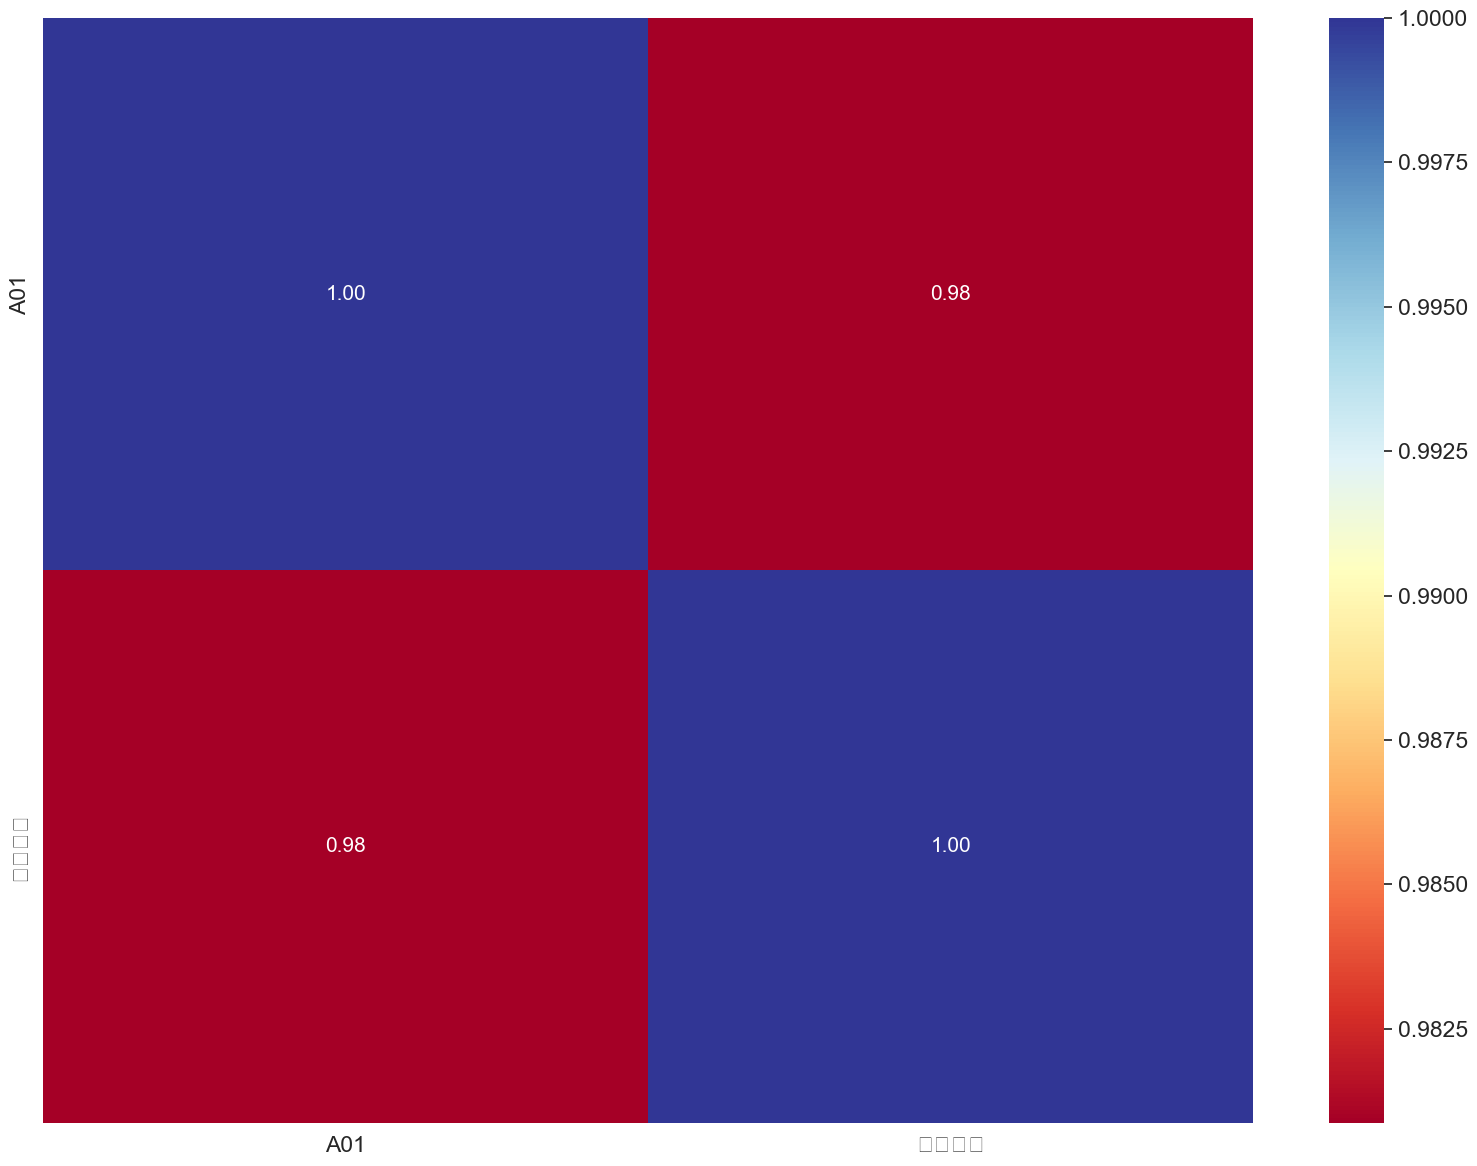

In [ ]:
# heatmap (seaborn)
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = onon.columns, xticklabels = onon.columns, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47588 missing from cur

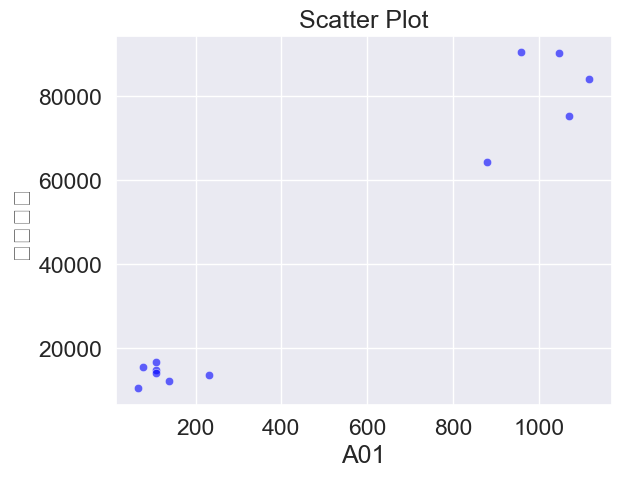

In [ ]:
sns.scatterplot(data=onon, x=onon['A01'], y=onon['구매수량'], markers='o', color='blue',alpha=0.6)
plt.title('Scatter Plot')
plt.show()